In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
data = pd.read_csv("hotel_clean.csv")
data.drop(columns = "Unnamed: 0", inplace = True)

In [30]:
data_temp = data.loc[data.is_canceled == 1].canceled_days.to_frame()

# canceled_days

canceled_days = number of days before arrival when the booking was canceled

exploring the distribution to understand when people are cancelling their bookings

## distplot 

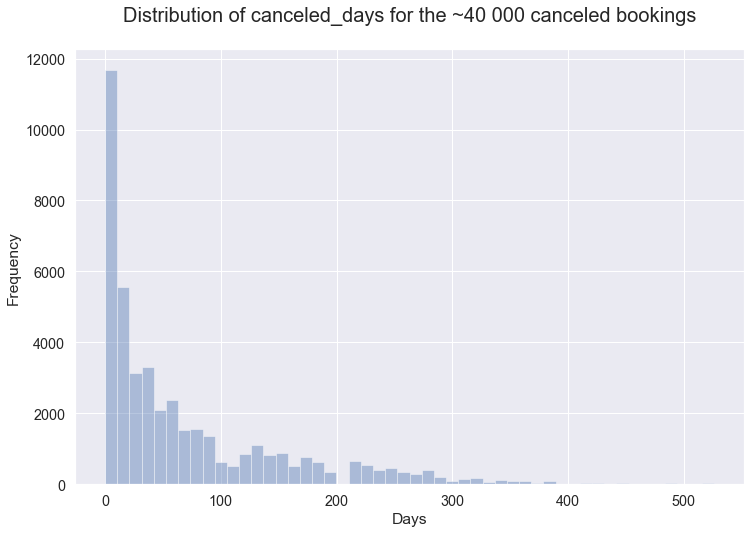

In [50]:
sns.set(font_scale = 1.3)
plt.figure(figsize = (12,8))
sns.distplot(data_temp, kde = False)
plt.ylabel("Frequency")
plt.xlabel("Days")
plt.title("Distribution of canceled_days for the ~40 000 canceled bookings\n", fontsize = 20)
plt.show()

In [3]:
# Most cancellations occur 0 days before arrival
# Sloping distribution from 0-400 days 

## quartile bins

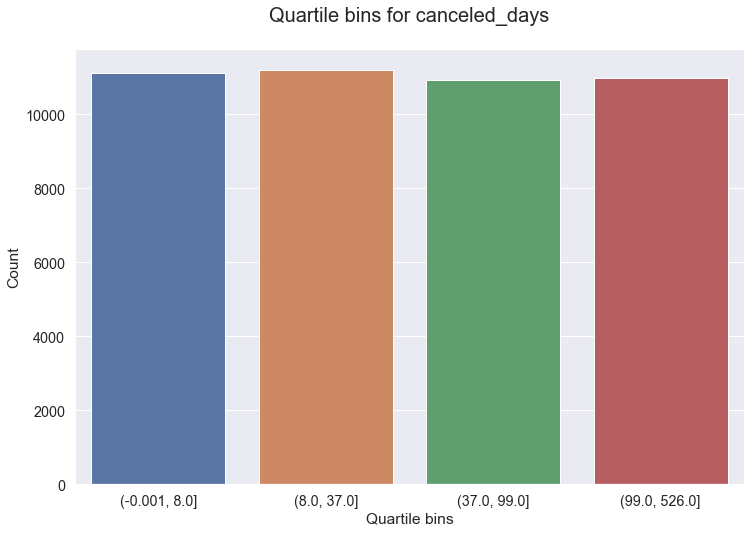

In [52]:
plt.figure(figsize = (12,8))
sns.countplot(pd.qcut(data_temp.canceled_days, q = 4))
plt.ylabel("Count")
plt.xlabel("Quartile bins")
plt.title("Quartile bins for canceled_days\n", fontsize = 20)
plt.show()

In [4]:
# 0-8 days + 8-37 days cover 50% of sample. These are especially interesting since they should prove difficulties for...
# ... resource-management

# `adr` (average daily rate) for is_canceled y/n

In [61]:
data.drop(48515, inplace = True)
# Had super high adr. Missed it when cleaning.

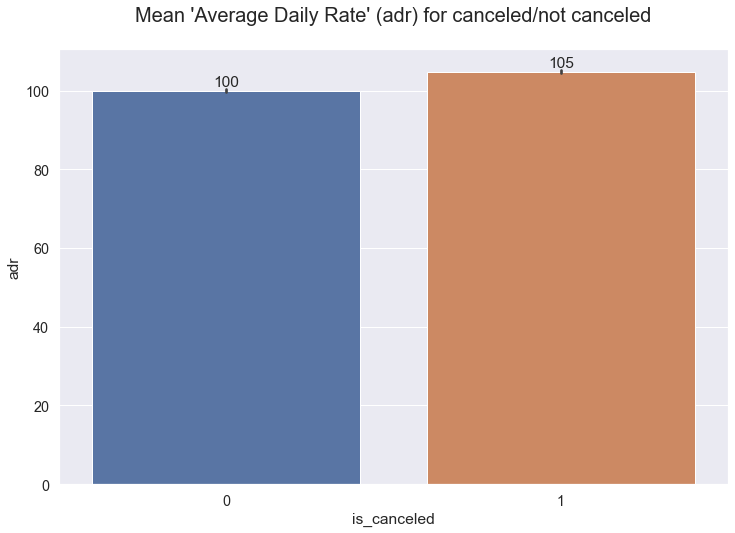

In [70]:
plt.figure(figsize = (12,8))
splot = sns.barplot(data = data, x = "is_canceled", y = "adr")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title("Mean 'Average Daily Rate' (adr) for canceled/not canceled\n", fontsize = 20)
plt.show()

In [1]:
# Higher adr for cancelled bookings. Significant difference since we have such a large sample. 

# `lead_time` for is_canceled y/n

lead_time = number of days before arrival that the booking was made

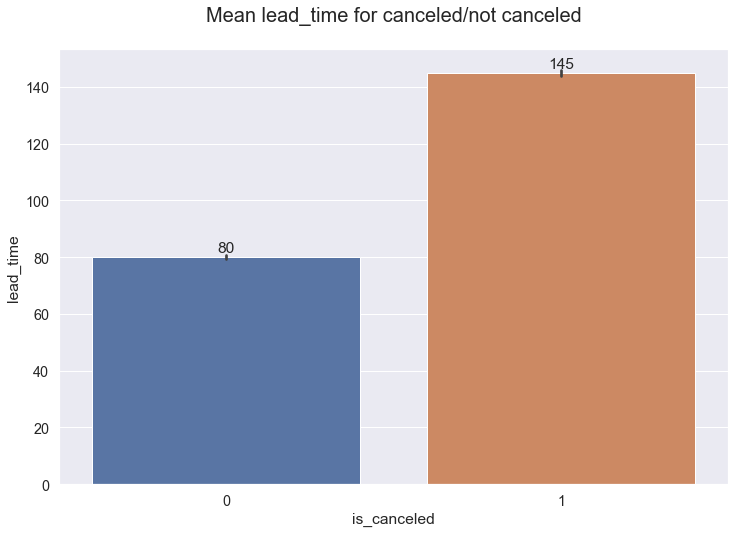

In [74]:
plt.figure(figsize = (12,8))
splot = sns.barplot(data = data, x = "is_canceled", y = "lead_time")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title("Mean lead_time for canceled/not canceled\n", fontsize = 20)
plt.show()

In [2]:
# Much higher lead-time for canceled-bookings. Might be because of bookings that show up very close to arrival...
#..., say 0-5 days, are highly unlikely to cancel

# Number of cancellations per month

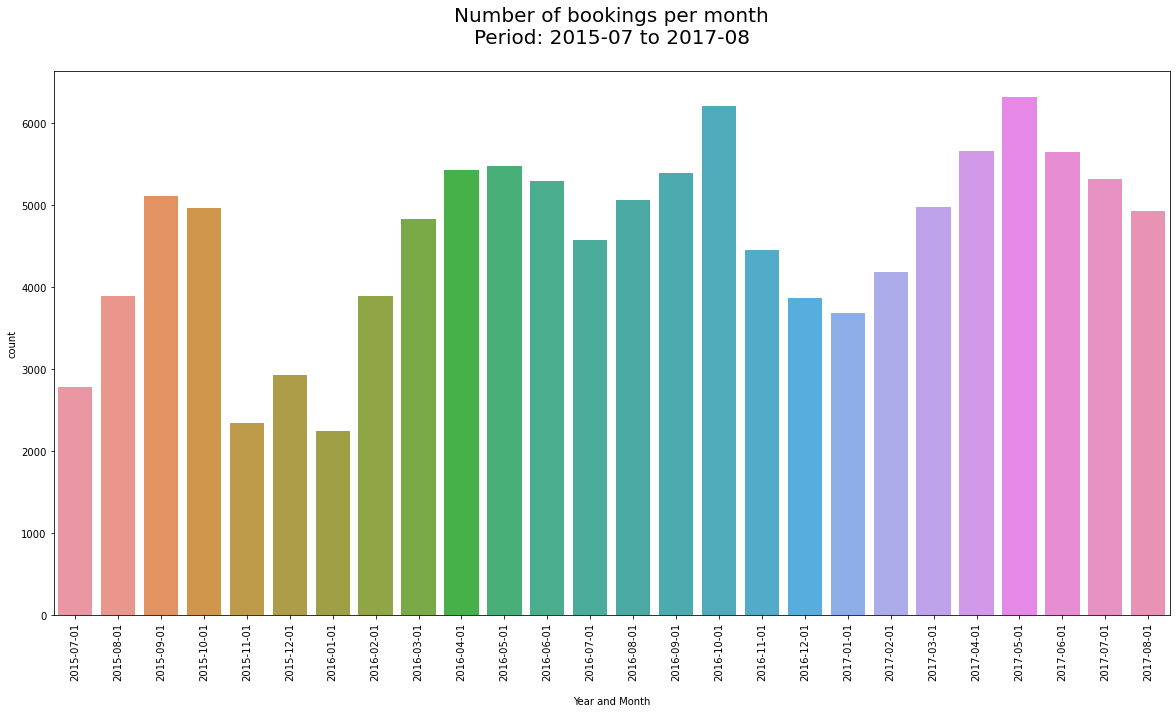

In [10]:
data_temp = data.groupby("year_mo").size().to_frame().reset_index()

plt.figure(figsize = (20,10))
sns.barplot(data = data_temp, x = "year_mo", y = 0)
plt.xticks(rotation = 90)
plt.ylabel("count")
plt.xlabel("\nYear and Month")
plt.title("Number of bookings per month\nPeriod: 2015-07 to 2017-08\n", fontsize = 20)
plt.show()

# Number of bookings per month

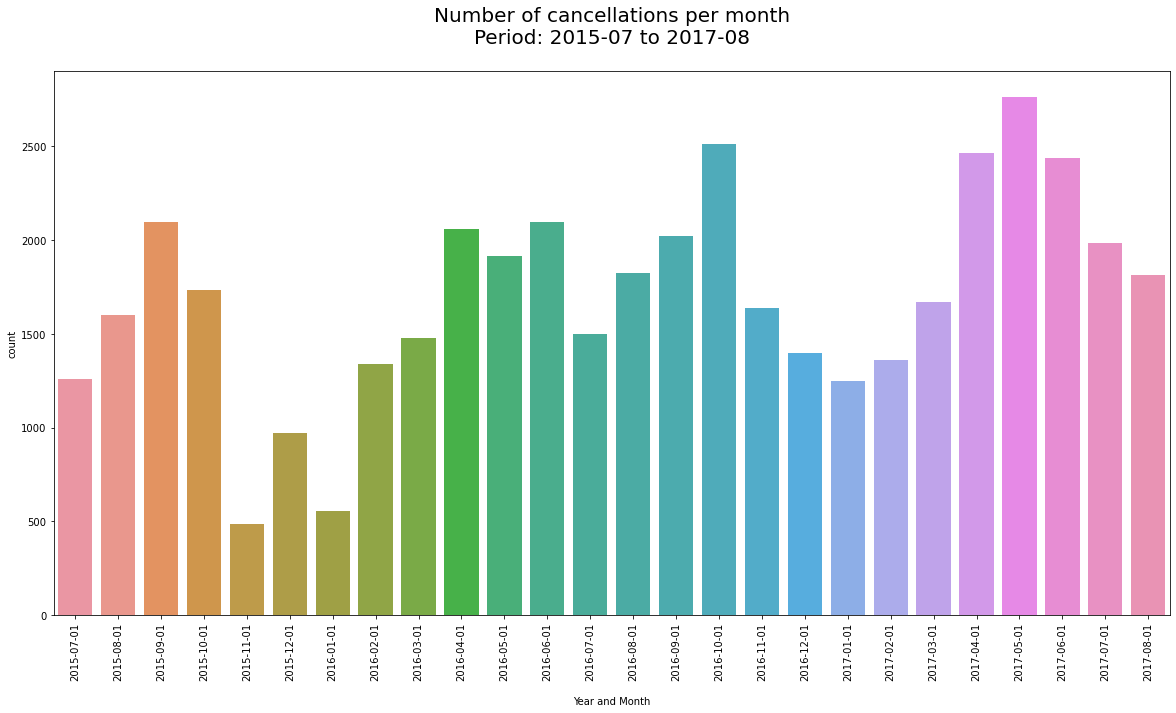

In [9]:
data_temp = data.loc[data.is_canceled == 1].groupby("year_mo").size().to_frame().reset_index()

plt.figure(figsize = (20,10))
sns.barplot(data = data_temp, x = "year_mo", y = 0)
plt.xticks(rotation = 90)
plt.ylabel("count")
plt.xlabel("\nYear and Month")
plt.title("Number of cancellations per month\nPeriod: 2015-07 to 2017-08\n", fontsize = 20)
plt.show()